In [1]:
import pandas
import pandas as pd
import geopandas as gpd
from tobler.area_weighted import area_interpolate
from tobler.dasymetric import masked_area_interpolate
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
income = gpd.read_parquet('./income/ca_tract_incomes.parquet')

In [3]:
income.head()

,GEOID,median_household_income,median_home_value,per_capita_income,geometry
0,06037554001,55703.0,450200.0,23331.0,"POLYGON ((5987925.784 2275112.258, 5988249.105..."
1,06037554002,56452.0,461200.0,22520.0,"POLYGON ((5987299.089 2275049.015, 5987348.882..."
2,06037554101,42969.0,453200.0,19127.0,"POLYGON ((5992628.264 2276367.468, 5992690.382..."
3,06037554103,81480.0,460200.0,34880.0,"POLYGON ((5992635.820 2276956.239, 5992710.707..."
4,06037554104,63625.0,464800.0,20344.0,"POLYGON ((5993599.563 2274986.574, 5993703.488..."


In [4]:
income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8057 entries, 0 to 8056
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   GEOID                    8057 non-null   object  
 1   median_household_income  7965 non-null   float64 
 2   median_home_value        7831 non-null   float64 
 3   per_capita_income        8007 non-null   float64 
 4   geometry                 8057 non-null   geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 377.7+ KB


In [5]:
income['GEOID'] = income['GEOID'].astype(str).str[:5]

In [6]:
income.GEOID.astype('object')

0       06037
1       06037
2       06037
3       06037
4       06037
        ...  
8052    06115
8053    06115
8054    06115
8055    06115
8056    06115
Name: GEOID, Length: 8057, dtype: object

In [7]:
income.head()

,GEOID,median_household_income,median_home_value,per_capita_income,geometry
0,06037,55703.0,450200.0,23331.0,"POLYGON ((5987925.784 2275112.258, 5988249.105..."
1,06037,56452.0,461200.0,22520.0,"POLYGON ((5987299.089 2275049.015, 5987348.882..."
2,06037,42969.0,453200.0,19127.0,"POLYGON ((5992628.264 2276367.468, 5992690.382..."
3,06037,81480.0,460200.0,34880.0,"POLYGON ((5992635.820 2276956.239, 5992710.707..."
4,06037,63625.0,464800.0,20344.0,"POLYGON ((5993599.563 2274986.574, 5993703.488..."


In [8]:
income = income[['GEOID','geometry','median_household_income', 'median_home_value', 'per_capita_income']]

In [9]:
county_income = income.dissolve(by='GEOID', aggfunc='sum')

In [10]:
county_income.head()

,geometry,median_household_income,median_home_value,per_capita_income
GEOID,,,,
06001,"POLYGON ((4917194.941 3614522.476, 4917150.603...",35617311.0,249149602.0,16280835.0
06003,"POLYGON ((5465900.782 4041889.701, 5465928.761...",64688.0,349000.0,29041.0
06005,"POLYGON ((5327665.355 3945457.409, 5327513.470...",554908.0,2690900.0,272068.0
06007,"POLYGON ((4952368.311 4287623.135, 4952479.510...",2584923.0,12915300.0,1373736.0
06009,"POLYGON ((5371063.042 3841172.558, 5371068.838...",554899.0,2975500.0,366966.0


In [11]:
county_income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 58 entries, 06001 to 06115
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   geometry                 58 non-null     geometry
 1   median_household_income  58 non-null     float64 
 2   median_home_value        58 non-null     float64 
 3   per_capita_income        58 non-null     float64 
dtypes: float64(3), geometry(1)
memory usage: 4.3+ KB


In [12]:
county_income.to_csv('county-income.csv')

<AxesSubplot:>

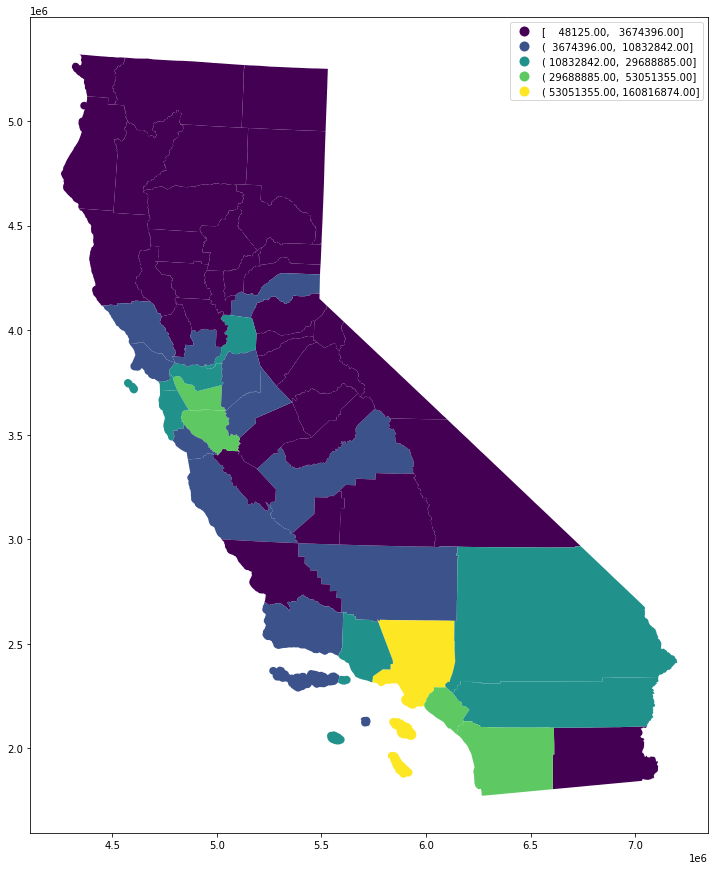

In [13]:
county_income.plot(column='median_household_income', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

In [14]:
#crs

In [15]:
county_income.crs

In [16]:
#School County Data

In [17]:
sch = gpd.read_parquet('SchoolCounty_Data.parquet')

In [18]:
sch.head()

,geoid,geometry,fips,name,state,CountyName,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate,Dropout (Rate),Regular HS Diploma Graduates (Rate)
0,06001,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",06001,Alameda,CA,Alameda,373198.0,2345464.0,0.159115,46304.3,345454.1
1,06005,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",06005,Amador,CA,Amador,7356.0,48087.0,0.152973,863.6,18292.4
3,06007,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",06007,Butte,CA,Butte,58888.0,338729.0,0.173850,17108.3,88204.6
5,06009,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",06009,Calaveras,CA,Calaveras,9848.0,58591.0,0.168080,1854.2,29262.6
6,06011,"POLYGON ((-122.08018 39.41420, -122.07996 39.4...",06011,Colusa,CA,Colusa,5371.0,60099.0,0.089369,2365.2,29169.2


In [19]:
sch.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 57 entries, 0 to 84
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   geoid                                57 non-null     object  
 1   geometry                             57 non-null     geometry
 2   fips                                 57 non-null     object  
 3   name                                 57 non-null     object  
 4   state                                57 non-null     object  
 5   CountyName                           57 non-null     object  
 6   ChronicAbsenteeismCount              57 non-null     float64 
 7   CumulativeEnrollment                 57 non-null     float64 
 8   absentrate                           57 non-null     float64 
 9   Dropout (Rate)                       57 non-null     float64 
 10  Regular HS Diploma Graduates (Rate)  57 non-null     float64 
dtypes: float64(5)

<AxesSubplot:>

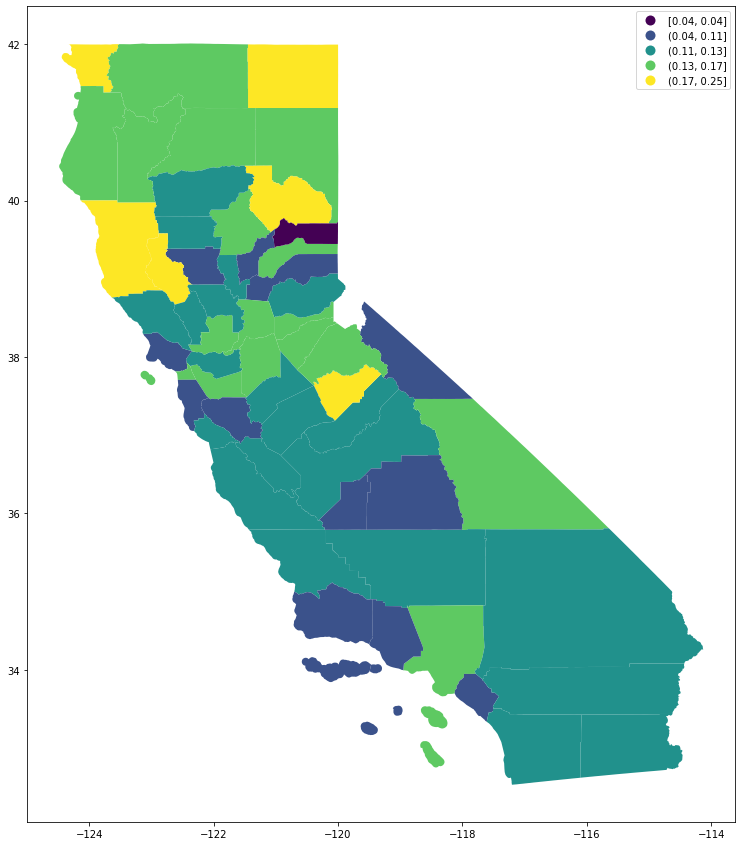

In [20]:
sch.plot(column='absentrate', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

In [21]:
#crs

In [22]:
sch.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
county_income.crs = "EPSG:4326" 

In [24]:
county_income = county_income.to_crs(sch.crs)

In [25]:
county_income.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
county_income.head()

,geometry,median_household_income,median_home_value,per_capita_income
GEOID,,,,
06001,"POLYGON ((4917194.941 3614522.476, 4917150.603...",35617311.0,249149602.0,16280835.0
06003,"POLYGON ((5465900.782 4041889.701, 5465928.761...",64688.0,349000.0,29041.0
06005,"POLYGON ((5327665.355 3945457.409, 5327513.470...",554908.0,2690900.0,272068.0
06007,"POLYGON ((4952368.311 4287623.135, 4952479.510...",2584923.0,12915300.0,1373736.0
06009,"POLYGON ((5371063.042 3841172.558, 5371068.838...",554899.0,2975500.0,366966.0


In [28]:
sch_income = gpd.sjoin(sch, county_income, how='inner', op='intersects')

In [29]:
sch_income.head()

,geoid,geometry,fips,name,state,CountyName,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate,Dropout (Rate),Regular HS Diploma Graduates (Rate),index_right,median_household_income,median_home_value,per_capita_income


In [32]:
#sch_income .shape

In [33]:
#sch_income.plot()

In [34]:
demographic = gpd.read_parquet('demographics_tracts.parquet')

In [35]:
demographic.head()

,GEOID1,total_mf_10_19,geometry
0,06037137504,229.0,"POLYGON ((-118.58119 34.14318, -118.58099 34.1..."
1,06037138000,404.0,"POLYGON ((-118.60573 34.14585, -118.60561 34.1..."
2,06037139200,625.0,"POLYGON ((-118.53082 34.18024, -118.52952 34.1..."
3,06067002300,259.0,"POLYGON ((-121.50218 38.55643, -121.50184 38.5..."
4,06067002400,452.0,"POLYGON ((-121.50970 38.54070, -121.50960 38.5..."


In [36]:
demographic['GEOID1'] = demographic['GEOID1'].astype(str).str[:5]

In [37]:
income.GEOID.astype('object')

0       06037
1       06037
2       06037
3       06037
4       06037
        ...  
8052    06115
8053    06115
8054    06115
8055    06115
8056    06115
Name: GEOID, Length: 8057, dtype: object

In [38]:
dmg = demographic.dissolve(by='GEOID1', aggfunc='sum')

In [39]:
dmg.crs = "EPSG:4326"

In [40]:
dmg = dmg.to_crs(county_income.crs)

In [41]:
dmg.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [42]:
dmg.head()

,geometry,total_mf_10_19
GEOID1,,
06001,"POLYGON ((-121.90392 37.46454, -121.90407 37.4...",189657.0
06003,"POLYGON ((-120.07333 38.70109, -120.07324 38.7...",193.0
06005,"POLYGON ((-120.54130 38.42291, -120.54181 38.4...",3705.0
06007,"POLYGON ((-121.90870 39.30799, -121.90834 39.3...",27187.0
06009,"POLYGON ((-120.37620 38.14265, -120.37616 38.1...",4245.0


In [43]:
dmg_sch = gpd.sjoin(dmg, sch, how='inner', op='intersects')

In [44]:
dmg_sch.head()

,geometry,total_mf_10_19,index_right,geoid,fips,name,state,CountyName,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate,Dropout (Rate),Regular HS Diploma Graduates (Rate)
GEOID1,,,,,,,,,,,,,
06001,"POLYGON ((-121.90392 37.46454, -121.90407 37.4...",189657.0,65,06085,06085,Santa Clara,CA,Santa Clara,246931.0,2651967.0,0.093112,58946.3,272796.9
06047,"POLYGON ((-121.24865 37.03368, -121.24807 37.0...",45837.0,65,06085,06085,Santa Clara,CA,Santa Clara,246931.0,2651967.0,0.093112,58946.3,272796.9
06069,"POLYGON ((-121.48438 36.71334, -121.48420 36.7...",9147.0,65,06085,06085,Santa Clara,CA,Santa Clara,246931.0,2651967.0,0.093112,58946.3,272796.9
06081,"POLYGON ((-122.16269 37.45384, -122.16272 37.4...",84632.0,65,06085,06085,Santa Clara,CA,Santa Clara,246931.0,2651967.0,0.093112,58946.3,272796.9
06085,"POLYGON ((-121.47115 36.97797, -121.47121 36.9...",238587.0,65,06085,06085,Santa Clara,CA,Santa Clara,246931.0,2651967.0,0.093112,58946.3,272796.9


In [45]:
dmg_sch.to_csv('school-demographic.csv')

In [46]:
dmg_sch.shape

(340, 13)

In [48]:
import matplotlib.pyplot as plt

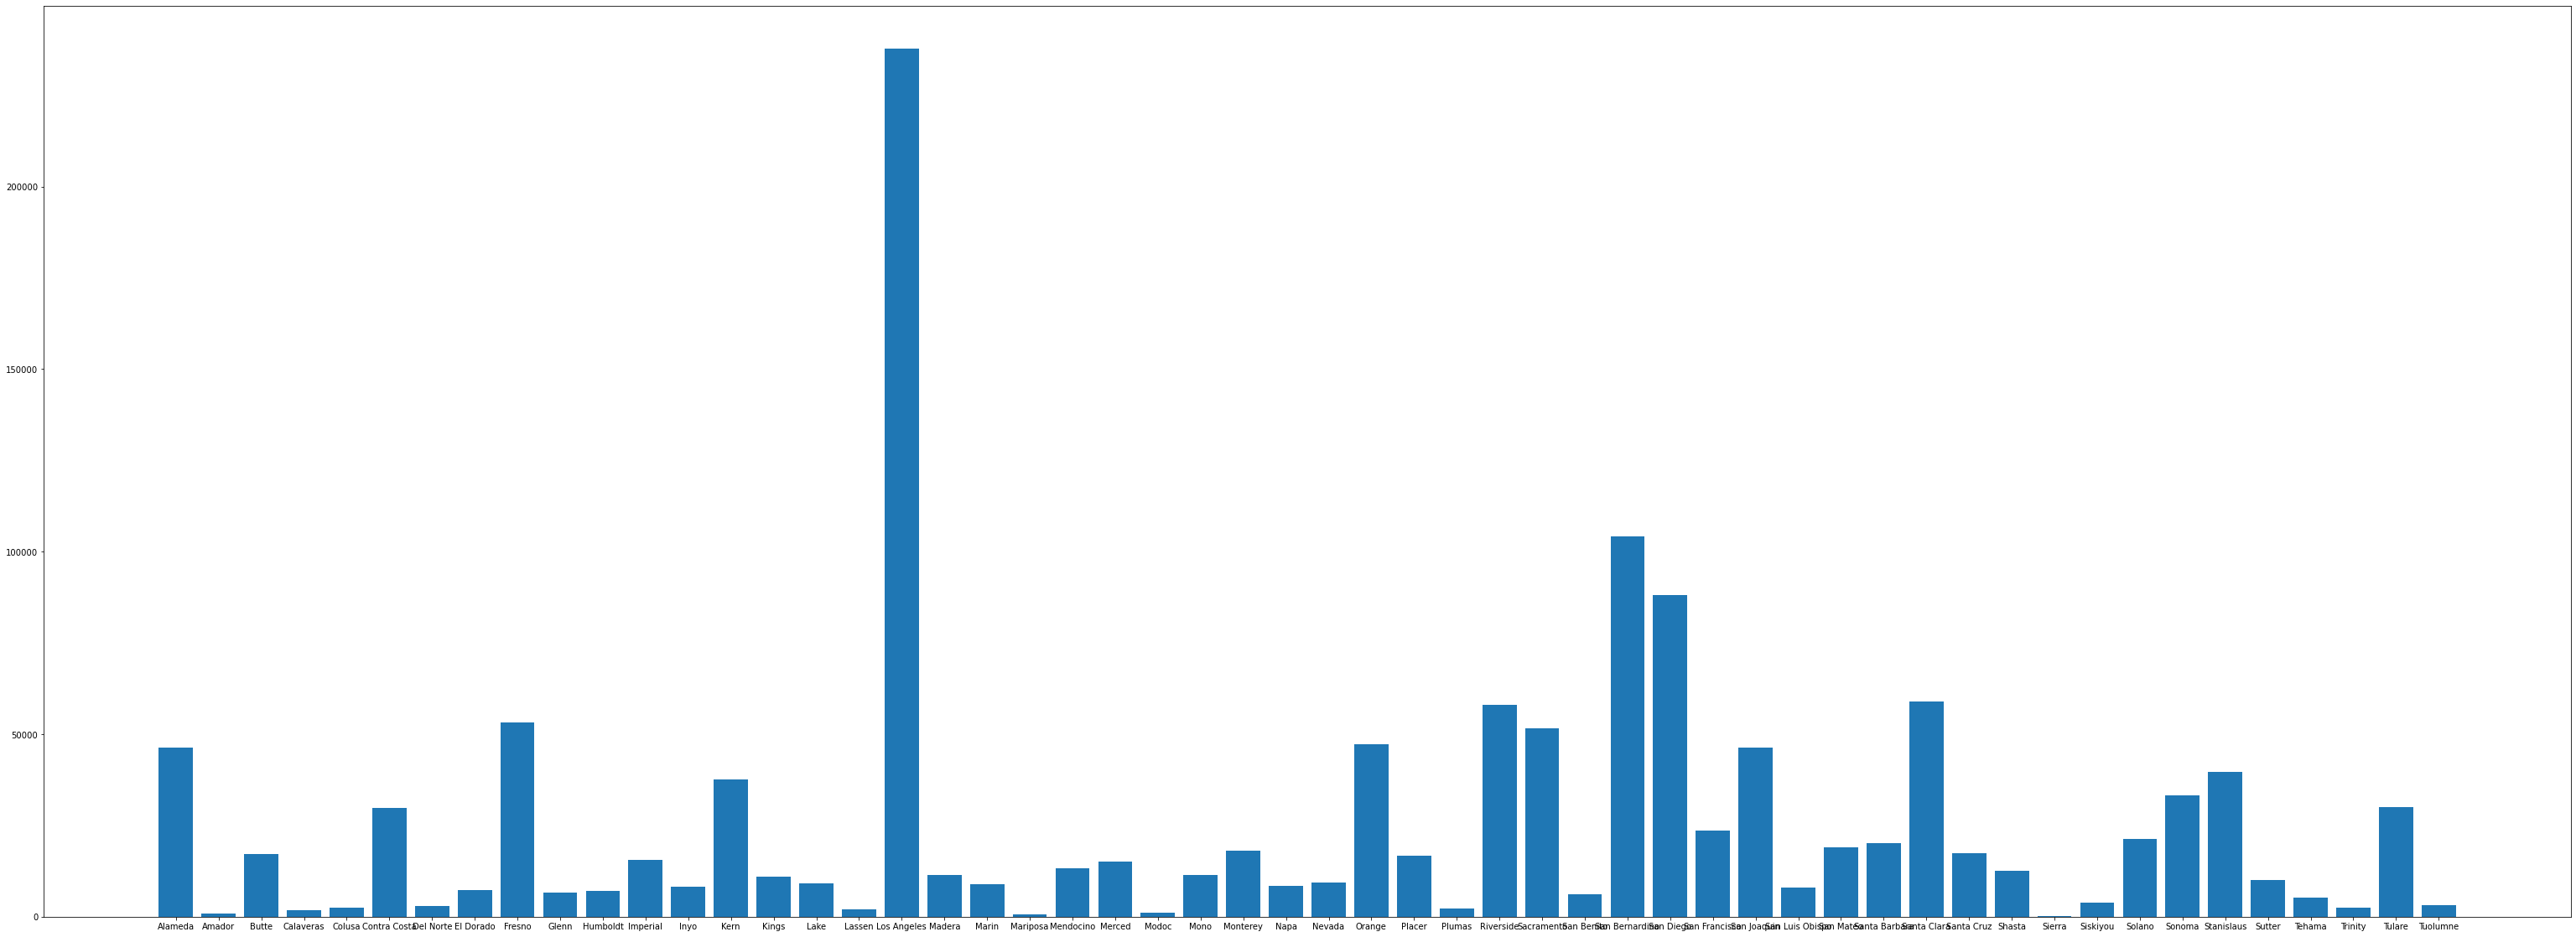

In [66]:
countyname = sch['CountyName'].head(84)
dropout = sch['Dropout (Rate)'].head(84)
 
# Figure Size
fig = plt.figure(figsize =(54, 20))
plt.bar(countyname[0:54],dropout[0:54])  
plt.show()

<AxesSubplot:xlabel='total_mf_10_19', ylabel='absentrate'>

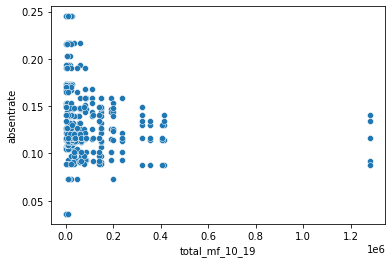

In [318]:
sns.scatterplot(data=dmg_income, y="absentrate", x="total_mf_10_19")